In [1]:
import collections
from pathlib import Path

import numpy as np

from astropy import table
from astropy import visualization
import specutils

from jwst import datamodels

%matplotlib inline
from matplotlib import pyplot as plt

Use the download list generated from [M31_spec_download.ipynb](file://M31_spec_download.ipynb)

In [2]:
ls download*ecsv

downloaded_assoc_products_2023-02-03_18:35:13.698.ecsv
downloaded_fgs_products_2023-02-01_18:02:26.650.ecsv
downloaded_products_2023-02-01_17:43:29.304.ecsv
downloaded_products_2023-02-03_18:08:08.193.ecsv


In [3]:
downloaded_tab = table.Table.read('downloaded_products_2023-02-01_17:43:29.304.ecsv')
downloaded_paths = [Path(pathstr) for pathstr in np.unique(downloaded_tab['Local Path'])]
print('nunique', len(downloaded_paths))
downloaded_tab

nunique 472


Local Path,Status,Message,URL
str110,str8,object,object
./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_cal.fits,COMPLETE,None,None
./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_crf.fits,COMPLETE,None,None
./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_s2d.fits,COMPLETE,None,None
./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_x1d.fits,COMPLETE,None,None
./mastDownload/JWST/jw02609-o009_s00002_nirspec_f100lp-g140h/jw02609-o009_s00002_nirspec_f100lp-g140h_cal.fits,COMPLETE,None,None
./mastDownload/JWST/jw02609-o009_s00002_nirspec_f100lp-g140h/jw02609-o009_s00002_nirspec_f100lp-g140h_crf.fits,COMPLETE,None,None
...,...,...,...
./mastDownload/JWST/jw02609009001_0410b_00001_nrs2/jw02609009001_0410b_00001_nrs2_x1d.fits,COMPLETE,None,None
./mastDownload/JWST/jw02609009001_0410b_00001_nrs2/jw02609009001_0410b_00001_nrs2_x1d.fits,COMPLETE,None,None


In [4]:
paths_by_filetype = collections.defaultdict(lambda:list())
for p in downloaded_paths:
    filetype = p.stem.split('_')[-1]
    paths_by_filetype[filetype].append(p)
paths_by_filetype = dict(paths_by_filetype)
{k:len(v) for k,v in paths_by_filetype.items()}

{'cal': 121, 'crf': 103, 's2d': 115, 'x1d': 115, 'rate': 18}

In [5]:
cal_example = datamodels.open(paths_by_filetype['cal'][0])
crf_example = datamodels.open(paths_by_filetype['crf'][0])
s2d_example = datamodels.open(paths_by_filetype['s2d'][0])
x1d_example = datamodels.open(paths_by_filetype['x1d'][0])

for dm in [cal_example, crf_example, s2d_example, x1d_example]:
    print(dm.meta.filename)
    dm.info()
    print('')

jw02609-o009_s00001_nirspec_f100lp-g140h_cal.fits
root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 2.13.0
├─history (dict)
│ └─extensions (list) ...
├─_fits_hash (str): 70aecf7b5f412a1fa6ba1f1ffb587deba7980c54d32da1797a3cc95551299e7e
├─exposures (list)
│ ├─[0] (AsdfObject) ...
│ ├─[1] (AsdfObject) ...
│ ├─[2] (AsdfObject) ...
│ ├─[3] (AsdfObject) ...
│ ├─[4] (AsdfObject) ...
│ ├─[5] (AsdfObject) ...
│ ├─[6] (AsdfObject) ...
│ ├─[7] (AsdfObject) ...
│ ├─[8] (AsdfObject) ...
│ ├─[9] (AsdfObject) ...
│ └─2 not shown
├─meta (dict) ...
└─slits (list)
Some nodes not shown.

jw02609-o009_s00001_nirspec_f100lp-g140h_crf.fits
root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 2.13.0
├─history (dict)
│ └─extensions (list) ...
├─_fits_hash (str): 

2023-02-07 21:09:10,677 - stpipe - WARNING - /usr/local/lib/python3.11/site-packages/astropy/units/core.py:2097: UnitsWarning: '(MJy/sr)^2' did not parse as fits unit: Syntax error parsing unit '(MJy/sr)^2' If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html
  warnings.warn(msg, UnitsWarning)

2023-02-07 21:09:10,885 - stpipe - WARNING - /usr/local/lib/python3.11/site-packages/matplotlib/axes/_base.py:2532: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)



<WCSAxesSubplot: ylabel='Data [Jy]'>

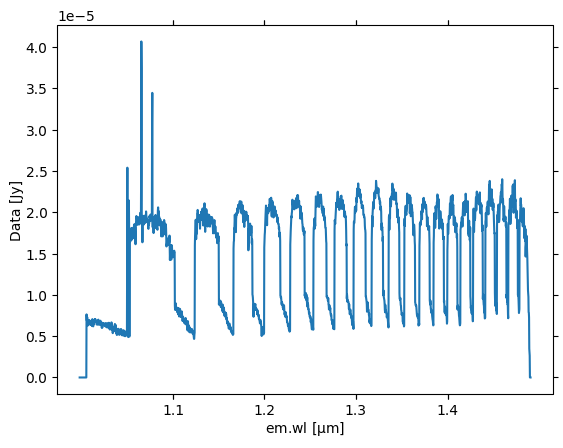

In [6]:
x1d_spec = specutils.Spectrum1D.read(paths_by_filetype['x1d'][0])

x1d_spec.plot()

In [7]:
list(cal_example.exposures[0])

['barshadow',
 'data',
 'dither_position',
 'dq',
 'err',
 'int_times',
 'meta.aperture.name',
 'meta.aperture.position_angle',
 'meta.aperture.pps_name',
 'meta.asn.exptype',
 'meta.asn.pool_name',
 'meta.asn.table_name',
 'meta.bunit_data',
 'meta.bunit_err',
 'meta.cal_step.assign_wcs',
 'meta.cal_step.barshadow',
 'meta.cal_step.dark_sub',
 'meta.cal_step.dq_init',
 'meta.cal_step.extract_2d',
 'meta.cal_step.flat_field',
 'meta.cal_step.gain_scale',
 'meta.cal_step.group_scale',
 'meta.cal_step.imprint',
 'meta.cal_step.ipc',
 'meta.cal_step.jump',
 'meta.cal_step.linearity',
 'meta.cal_step.master_background',
 'meta.cal_step.msa_flagging',
 'meta.cal_step.pathloss',
 'meta.cal_step.photom',
 'meta.cal_step.ramp_fit',
 'meta.cal_step.refpix',
 'meta.cal_step.saturation',
 'meta.cal_step.srctype',
 'meta.cal_step.superbias',
 'meta.cal_step.wavecorr',
 'meta.calibration_software_revision',
 'meta.calibration_software_version',
 'meta.compress',
 'meta.coordinates.reference_frame',

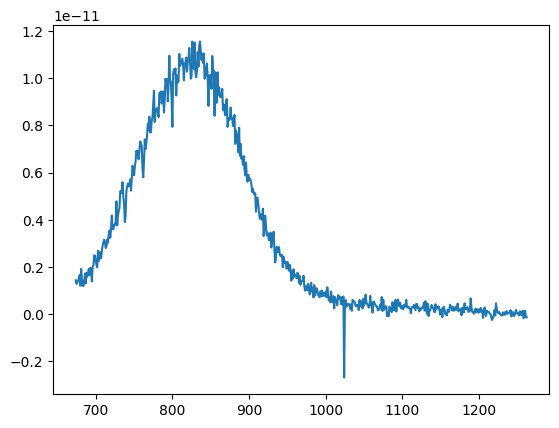

In [8]:
plt.plot(cal_example.exposures[-3].data[10])

2023-02-07 21:09:13,326 - stpipe - WARNING - /usr/local/lib/python3.11/site-packages/astropy/visualization/mpl_normalize.py:180: RuntimeWarning: invalid value encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)



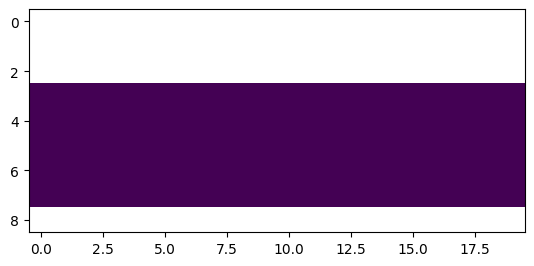

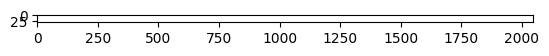

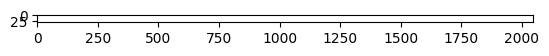

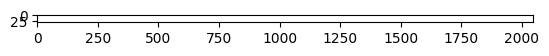

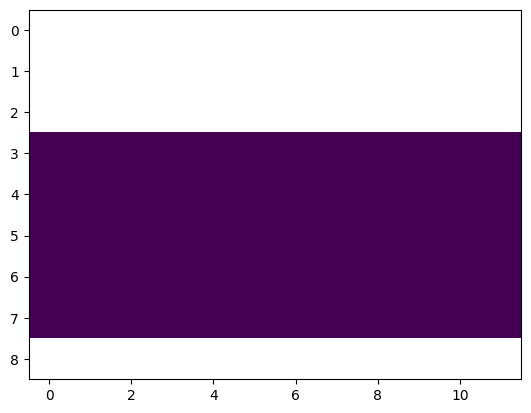

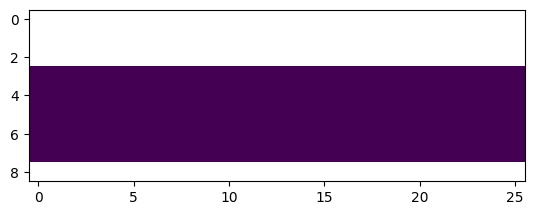

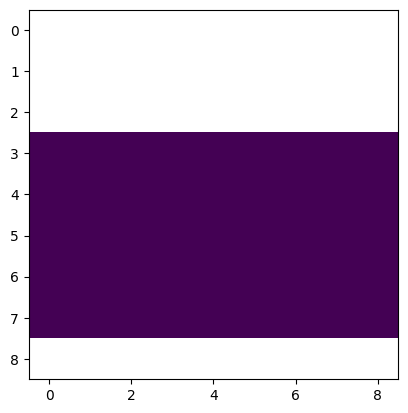

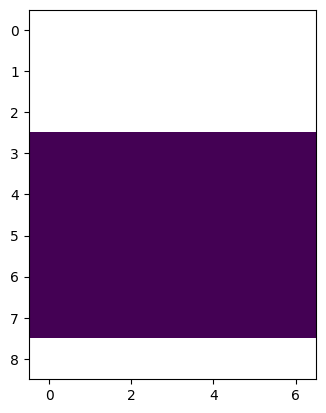

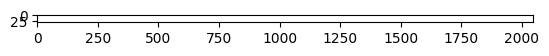

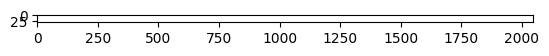

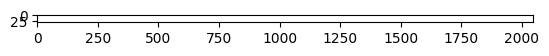

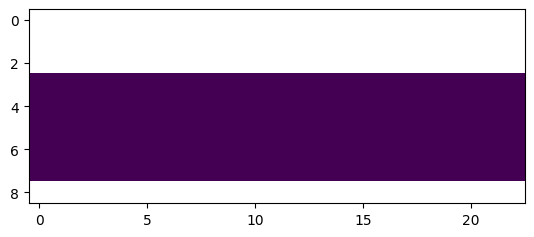

In [9]:
for i, exp in enumerate(cal_example.exposures):
    plt.figure()
    visualization.imshow_norm(exp.data,
                              interval=visualization.PercentileInterval(99),
                              stretch=visualization.LogStretch()
                             )

In [10]:
rawer_path = paths_by_filetype['cal'][-1]
rawer_dm = datamodels.open(rawer_path)
rawer_dm.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 2.13.0
├─history (dict)
│ └─extensions (list) ...
├─_fits_hash (str): 14167e4dddc7c8d25496e26c3a38e7f798cfd3dafe590eac92b37cb3bb3fcadd
├─meta (dict)
│ ├─aperture (dict) ...
│ ├─asn (dict) ...
│ ├─bunit_data (str): MJy
│ ├─bunit_err (str): MJy
│ ├─cal_step (dict) ...
│ ├─calibration_software_revision (str): RELEASE
│ ├─calibration_software_version (str): 1.8.2
│ ├─compress (bool): False
│ ├─coordinates (dict) ...
│ ├─data_processing_software_version (str): 2022_4a
│ ├─date (str): 2023-01-25T01:39:41.897
│ └─26 not shown
└─slits (list) ...
Some nodes not shown.


In [11]:
for i, slit in enumerate(rawer_dm.slits):
    print(i, slit.data.shape)

0 (31, 1873)
1 (30, 1897)
2 (28, 1940)
3 (30, 1923)
4 (29, 2048)
5 (28, 2048)
6 (30, 2040)
7 (29, 2048)
8 (31, 2048)
9 (30, 2048)
10 (29, 2048)
11 (29, 2048)
12 (29, 2048)
13 (29, 2048)
14 (31, 2048)
15 (28, 2048)
16 (29, 2048)
17 (28, 2048)
18 (25, 1974)
19 (25, 1990)
20 (25, 1997)
21 (23, 2042)
22 (26, 2014)
23 (26, 2038)
24 (24, 2048)
25 (24, 2048)
26 (25, 2048)
27 (24, 2048)
28 (25, 2048)
29 (25, 2048)
30 (26, 2048)
31 (24, 2048)
32 (25, 2048)
33 (24, 2048)
34 (25, 2048)
35 (24, 2048)
36 (23, 2048)
37 (24, 2048)
38 (25, 2048)
39 (25, 2048)
40 (26, 2048)
41 (23, 2048)
42 (25, 2048)
43 (25, 2048)
44 (25, 2048)
45 (24, 2048)
46 (24, 2048)
47 (25, 2048)
48 (23, 2048)
49 (25, 2048)
50 (24, 2048)
51 (25, 2048)
52 (32, 2048)
53 (30, 2048)
54 (30, 2048)
55 (30, 2048)
56 (30, 2048)
57 (32, 2048)
58 (31, 2048)
59 (30, 2048)
60 (31, 2048)
61 (31, 2048)
62 (32, 2048)
63 (31, 2048)
64 (30, 2048)
65 (30, 2048)
66 (31, 2048)
67 (28, 2048)
68 (29, 2048)
69 (32, 2048)
70 (29, 2048)
71 (29, 2048)
72

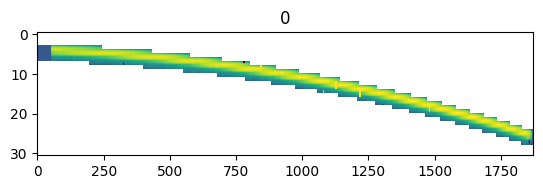

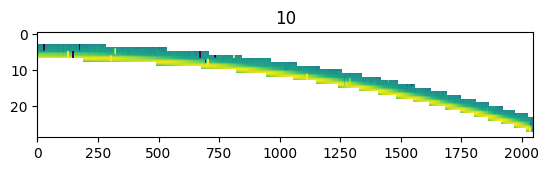

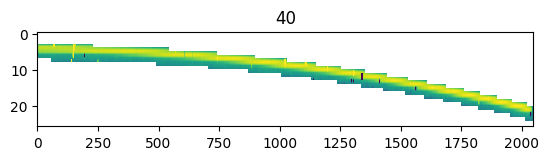

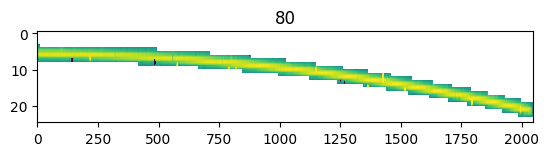

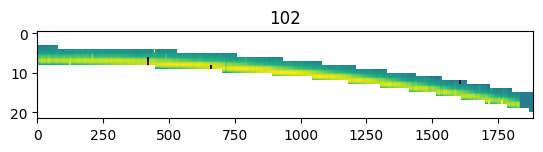

In [12]:
for slitidx in [0, 10,40, 80, 102]:
    slit = rawer_dm.slits[slitidx]
    
    plt.figure()
    visualization.imshow_norm(slit.data,
                              interval=visualization.PercentileInterval(99),
                              stretch=visualization.LogStretch(),
                              aspect=15
                             )
    plt.title(str(slitidx))

Ugh, NaNs. Lets confirm the rates are ok

In [13]:
dm_rate = datamodels.open(paths_by_filetype['rate'][-1])
dm_rate.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 2.13.0
├─history (dict)
│ └─extensions (list) ...
├─_fits_hash (str): d064f885dfd1e072dbbe3015b6ca84e320c6d99f0c7a217c7541dfb928747cb5
├─data (NDArrayType): shape=(2048, 2048), dtype=float32
├─dq (NDArrayType): shape=(2048, 2048), dtype=uint32
├─err (NDArrayType): shape=(2048, 2048), dtype=float32
├─meta (dict)
│ ├─aperture (dict) ...
│ ├─bunit_data (str): DN/s
│ ├─bunit_err (str): DN/s
│ ├─cal_step (dict) ...
│ ├─calibration_software_revision (str): RELEASE
│ ├─calibration_software_version (str): 1.8.2
│ ├─compress (bool): False
│ └─29 not shown
├─var_poisson (NDArrayType): shape=(2048, 2048), dtype=float32
└─var_rnoise (NDArrayType): shape=(2048, 2048), dtype=float32
Some nodes not shown.


(<matplotlib.image.AxesImage at 0x7f402c1dd190>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f402403c050>)

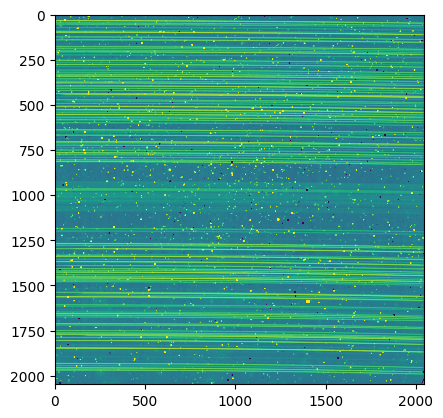

In [14]:
visualization.imshow_norm(dm_rate.data,
                          interval=visualization.PercentileInterval(99),
                          stretch=visualization.LogStretch(),
                         )

Could the WCS be where the issue lies?

In [69]:
s102 = rawer_dm.slits[102]
s102.slitlet_id, s102.shutter_id

(624, 56204)

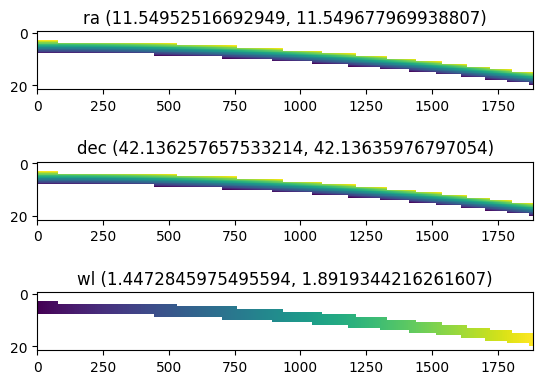

In [65]:
ypx, xpx = np.meshgrid(*(np.arange(s) for s in s102.data.shape))

coo, wl = s102.meta.wcs.pixel_to_world(xpx, ypx)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

im1 = ax1.imshow(coo.ra.deg.T, aspect=10)
ax1.set_title(f'ra {im1.get_clim()}')
im2 = ax2.imshow(coo.dec.deg.T, aspect=10)
ax2.set_title(f'dec {im2.get_clim()}')

im3 = ax3.imshow(wl.value.T, aspect=10)
ax3.set_title(f'wl {im3.get_clim()}');

yep, WCS is full of NaNs where there's actual spectra. Need to "open up" the slit sol'n somehow

Guess we're gonna have to run step 2 of the pipeline